<H1>Лабораторная работа №1 (ode)

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

out_dir = "./output/"
# file_name = "test1"
file_name = "var4"



In [11]:
def draw_plots_plotly(t, x, y, file_name, media_dir: str = "./media/", pl_show: bool = False):
    
    layout = go.Layout(autosize=False, width=800, height=600)

    fig = go.Figure(layout=layout)

    fig.add_trace(
        go.Scatter(x=x, y=y, mode="lines", name="")    
    )
    fig.update_layout(
        title="""Plot of X against Y""",
        #showlegend=True,
    )
    fig.update_xaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )
    fig.update_yaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )
    
    if pl_show:
        fig.show()

    fig.write_image(media_dir + file_name + "_x_y" + ".pdf")

    fig = go.Figure(layout=layout)

    fig.add_traces(
        [
            go.Scatter(x=t, y=x, mode="lines", name="Plot of Time against X"), 
            go.Scatter(x=t, y=y, mode="lines", name="Plot of Time against Y"), 
        ]

    )
    fig.update_layout(
        title="""Plot of Time against X and Y""",
        showlegend=True,
    )
    fig.update_xaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )
    fig.update_yaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )

    if pl_show:
        fig.show()
        
    fig.write_image(media_dir + file_name + "_t_x_y" + ".pdf")


    fig = make_subplots(
    rows=1, cols=3,    
    subplot_titles=("Plot of X against Y", "Plot of Time against X", "Plot of Time against Y")
    )

    fig.add_trace(
        go.Scatter(x=x, y=y, mode="lines", name=""),  
        row=1, col=1,
    )
    fig.add_trace(
        go.Scatter(x=t, y=x, mode="lines", name=""),   
        row=1, col=2,
    )
    fig.add_trace(
        go.Scatter(x=t, y=y, mode="lines", name=""),   
        row=1, col=3,
    )
    fig.update_xaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )
    fig.update_yaxes(
        showline=True,
        linewidth=1,
        linecolor="black",
        minor=dict(ticklen=5, tickcolor="black", showgrid=True),
    )
    fig.update_layout(height=500, width=1500, title_text="Graphs of the variables' dependencies", showlegend=False)
    
    if pl_show:
        fig.show()

    fig.write_image(media_dir + file_name + "_all" + ".pdf")

def draw_plots_matplotlib(t, x, y):
    
    plt.figure(figsize=(15,10))
    plt.subplot(3, 4, 1)
    plt.title("График зависимости (x, y) ")
    plt.grid()
    plt.plot(x,y,)# color = "")

    plt.subplot(3, 4, 2)
    plt.title("График зависимости (t, x) и (t, y) ")
    plt.grid()
    plt.plot(t,x,)# color = "red")
    plt.plot(t,y,)# color = "red")


    plt.subplot(3, 4, 3)
    plt.title("График зависимости (t, x) ")
    plt.grid()
    plt.plot(t,x, color = "red")

    plt.subplot(3, 4, 4)
    plt.title("График зависимости (t, y) ")
    plt.grid()
    plt.plot(t,y, color = "green")
    plt.show()


<H2> Явный метод Эйлера

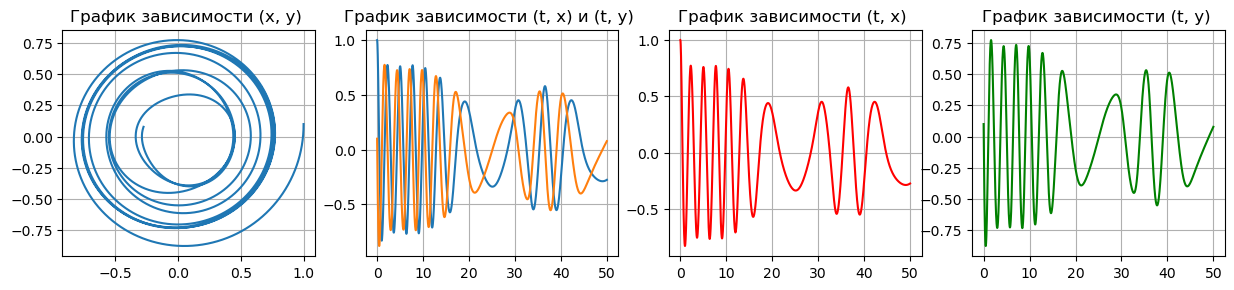

In [12]:
method_name = "_ode_Euler_output"

df = pd.read_csv(out_dir + file_name + method_name + ".csv")

t = df["time"]
x = df["u0"]
y = df["u1"]

draw_plots_plotly(t, x, y, file_name + method_name)
draw_plots_matplotlib(t, x, y)



<H2> Метод Рунге-Кутты 4 порядка (с постоянным шагом)

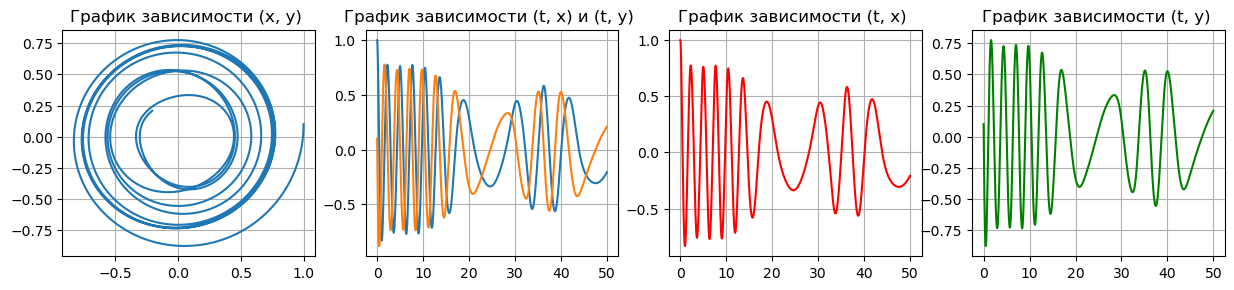

In [13]:
method_name = "_ode_RK4_fix_step_output"

df = pd.read_csv(out_dir + file_name  + method_name + ".csv")

t = df["time"]
x = df["u0"]
y = df["u1"]

draw_plots_plotly(t, x, y, file_name + method_name)
draw_plots_matplotlib(t, x, y)

<H2> Метод Рунге-Кутты 4 порядка (с меняющимся шагом)

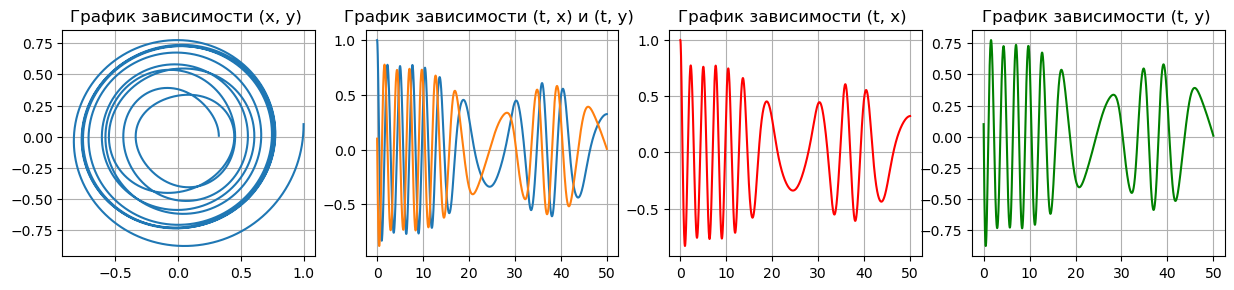

In [14]:
method_name = "_ode_RK4_vary_step_output"

df = pd.read_csv(out_dir + file_name + method_name + ".csv")

t = df["time"]
x = df["u0"]
y = df["u1"]

draw_plots_plotly(t, x, y, file_name + method_name)
draw_plots_matplotlib(t, x, y)

<H2> Метод Адамса-Башфорта 4 порядка (первые 3 шага --- метод Рунге-Кутты 4 порядка)

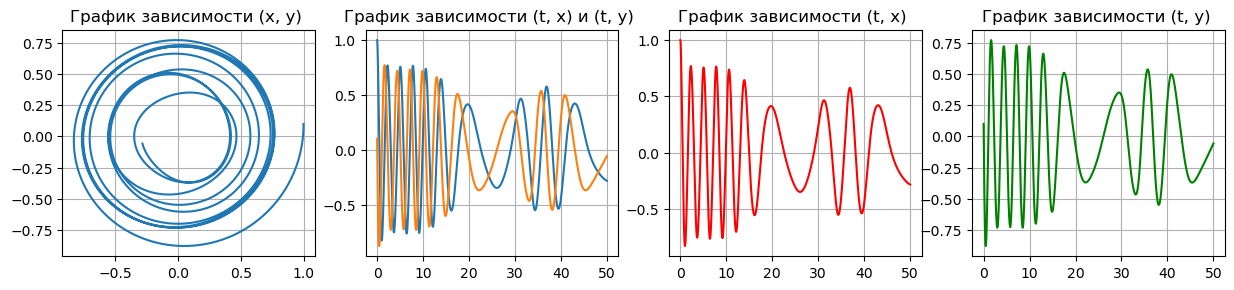

In [15]:
method_name = "_ode_AB4_output"

df = pd.read_csv(out_dir + file_name + method_name + ".csv")

t = df["time"]
x = df["u0"]
y = df["u1"]

draw_plots_plotly(t, x, y, file_name + method_name)
draw_plots_matplotlib(t, x, y)

<H2> Метод прогноз-коррекция

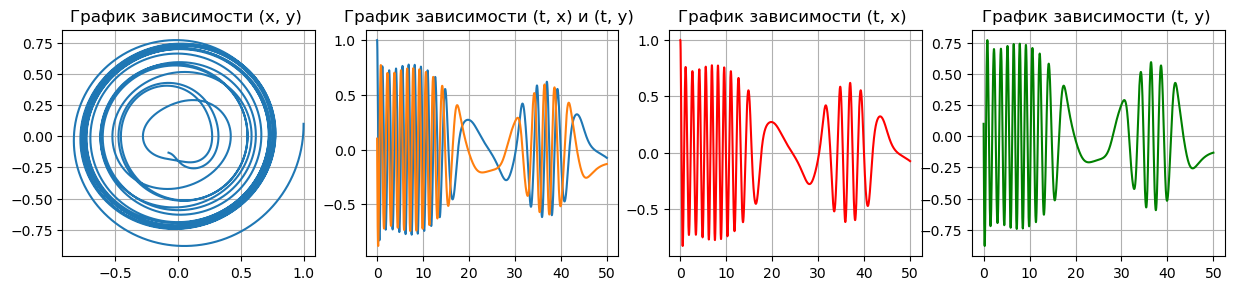

In [16]:
method_name = "_ode_Predictor_Corrector_output"

df = pd.read_csv(out_dir + file_name + method_name + ".csv")

tt = df["time"]
xx = df["u0"]
yy = df["u1"]

draw_plots_plotly(tt, xx, yy, file_name + method_name)
draw_plots_matplotlib(tt, xx, yy)


<H3> Сравнение AB4 & PC

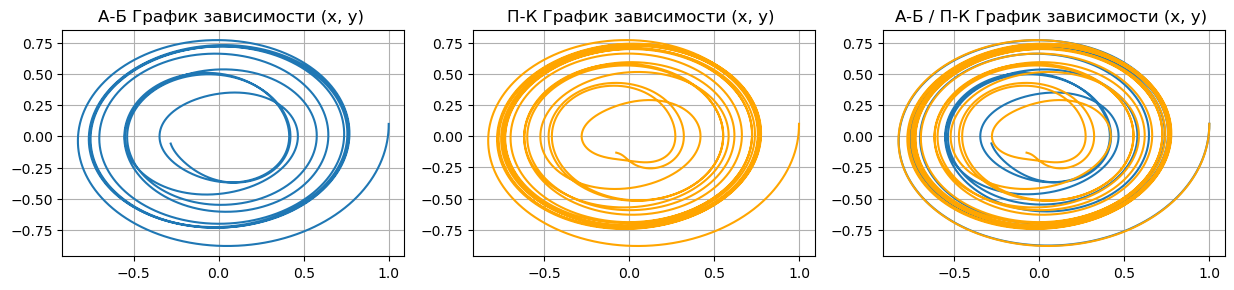

In [17]:

plt.figure(figsize=(15,10))
plt.subplot(3, 3, 1)
plt.title("А-Б График зависимости (x, y) ")
plt.grid()
plt.plot(x,y,)# color = "")

plt.subplot(3, 3, 2)
plt.title("П-К График зависимости (x, y) ")
plt.grid()
plt.plot(xx,yy, color = "orange")

plt.subplot(3, 3, 3)
plt.title("A-Б / П-К График зависимости (x, y) ")
plt.grid()
plt.plot(x,y,)# color = "")
plt.plot(xx,yy, color = "orange")
